###ECS659P: NEURAL NETWORKS & DEEP LEARNING
###2022/23 – Semester 2
###Submitted by Anushree Vishnoi 220756349





* The Problem: CIFAR-10 image classification with CNN 
* The Task: To build a model on the training set & evaluate it on the test set using PyTorch. The pipeline consists of:
    1. Read the dataset and create the appropriate dataloaders
    1. Create and initialise the model
    1. Create the loss and the optimizer
    1. Create the training function
    1. Train and evaluate the model
    
* Goal: To get the highest possible model accuracy on CIFAR-10 Validation(test) Set.

In [ ]:
#Installing the required pytorch librar - torchvision library to work on CIFAR10
import torch
import torchvision
import torchvision.datasets as datasets
import torchvision.transforms as transforms
import torch.utils.data as data
import torch.nn as nn
from torch.nn import functional as F
from torch import nn
from IPython import display
import my_utils as mu
import matplotlib.pyplot as plt
from torchvision.utils import make_grid

# Reading the dataset
Creating the Dataset objects

* Multiple data augementation on "transforms.Compose" function to crop and flip the input image and convert the image to tensors.

* CIFAR10 is not provided in tensor form by default, its provided as images hence preprocessing and converting it into tensors using transforms.ToTensor.

* The torchvision.datasets module contains Dataset objects for many real-world vision data like CIFAR-10.

* Here we use the function "torchvision.datsets.CIFAR10( )", to create the dataset objects train and test dataset.

* The function "torchvision.datsets.CIFAR10( )", takes the root directory of the dataset, the train/test split, downloads and an optional argument to transform the data before passing in th model.



In [ ]:
#Defining the root directory of the dataset='./data'
data_dir = './data'

#Using "transforms.Compose" function to chain together multiple data augmentation 
#Defining the transformation for converting the images to tensors using "transforms.ToTensor"
transform = transforms.Compose([transforms.RandomCrop(32, padding=4), transforms.RandomHorizontalFlip(p=0.5),
                                transforms.ToTensor()]) 

#Defining the train, test dataset for the CIFAR-10 dataset using "torchvision.datasets.CIFAR10()"
#Downloading the dataset in the root directory and applying transform to each image in the datset

train_dataset = torchvision.datasets.CIFAR10(root=data_dir, #TensorDataset object
                                             train=True, download=True,
                                             transform=transform)
test_dataset = torchvision.datasets.CIFAR10(root=data_dir, 
                                            train=False, download=True, 
                                            transform=transform)


100%|██████████| 170498071/170498071 [00:13<00:00, 12946536.72it/s]


Extracting ./data/cifar-10-python.tar.gz to ./data
Files already downloaded and verified


# Reading dataset and creating dataloaders

* The "data.DataLoader" function is used to create dataloaders which takes as inputs the dataset (train and test), the batch size and a shuffle parameter.

* Once the data loaders are created, they are used to iterate through the training and testing data in batches.


In [ ]:
#Defining the batch size
batch_size = 250

#Creating downloaders for training and testing datasets
train_loader = data.DataLoader (train_dataset, batch_size=batch_size,  #DataLoader object 
                                shuffle=True)
test_loader = data.DataLoader (test_dataset, batch_size=batch_size, 
                               shuffle=False)

classes = ("plane", "car", "bird", "cat", "deer", "dog", "frog", "horse", "ship", "truck")

In [ ]:
#Reading the dataset
next(iter(train_loader))

[tensor([[[[0.0000, 0.0000, 0.0000,  ..., 0.1020, 0.0980, 0.1098],
           [0.0000, 0.0000, 0.0000,  ..., 0.0980, 0.0980, 0.1059],
           [0.0000, 0.0000, 0.0000,  ..., 0.1176, 0.1098, 0.1059],
           ...,
           [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
           [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
           [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000]],
 
          [[0.0000, 0.0000, 0.0000,  ..., 0.1294, 0.1255, 0.1333],
           [0.0000, 0.0000, 0.0000,  ..., 0.1216, 0.1294, 0.1294],
           [0.0000, 0.0000, 0.0000,  ..., 0.1412, 0.1333, 0.1216],
           ...,
           [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
           [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
           [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000]],
 
          [[0.0000, 0.0000, 0.0000,  ..., 0.1647, 0.1451, 0.1569],
           [0.0000, 0.0000, 0.0000,  ..., 0.1608, 0.1608, 0.1647],
           [0.0000, 0.00

In [ ]:
#Reading and printing the dataset
x, y = next(iter(train_loader))
print(x.shape)
print(y)

torch.Size([250, 3, 32, 32])
tensor([9, 5, 4, 9, 3, 5, 1, 7, 6, 5, 0, 3, 3, 2, 1, 3, 4, 5, 8, 6, 4, 1, 0, 5,
        9, 8, 5, 5, 6, 2, 5, 9, 1, 3, 6, 8, 8, 4, 4, 4, 9, 7, 5, 8, 8, 5, 1, 8,
        2, 4, 1, 6, 9, 3, 5, 5, 2, 4, 2, 3, 0, 2, 0, 2, 2, 2, 3, 9, 0, 8, 7, 7,
        0, 4, 3, 1, 7, 7, 8, 3, 1, 3, 7, 6, 9, 1, 3, 8, 1, 4, 9, 5, 3, 2, 5, 6,
        6, 2, 7, 2, 1, 4, 6, 5, 0, 1, 9, 8, 8, 9, 7, 6, 5, 4, 8, 5, 3, 3, 3, 8,
        7, 3, 5, 5, 6, 7, 8, 6, 4, 8, 8, 3, 3, 3, 1, 6, 6, 8, 4, 2, 8, 3, 9, 8,
        3, 1, 1, 0, 2, 2, 8, 5, 5, 9, 1, 6, 3, 9, 8, 7, 8, 0, 4, 7, 5, 1, 3, 4,
        3, 4, 4, 8, 3, 7, 0, 5, 6, 4, 7, 0, 7, 6, 7, 5, 3, 5, 9, 8, 0, 2, 3, 9,
        0, 8, 8, 4, 3, 2, 7, 3, 3, 7, 4, 0, 4, 4, 6, 6, 0, 6, 6, 3, 3, 9, 0, 7,
        6, 7, 1, 7, 3, 0, 5, 5, 2, 6, 0, 1, 3, 6, 9, 6, 7, 3, 8, 6, 8, 7, 1, 6,
        6, 2, 4, 9, 4, 1, 3, 6, 5, 1])


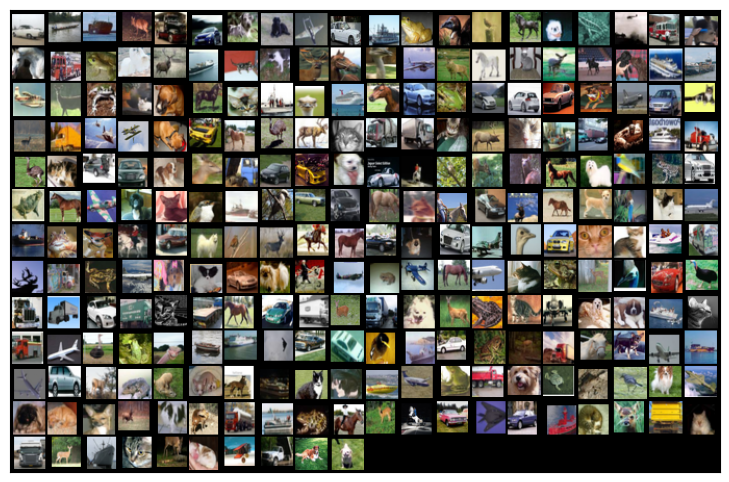

In [ ]:
#Displaying the first batch of 250 images from the training set
for images, labels in train_loader :
    fig, ax = plt.subplots(figsize=(12, 6))
    ax.set_xticks([])
    ax.set_yticks([])
    ax.imshow(make_grid(images, nrow=20).permute(1, 2, 0))
    break

# Defining the Model 
* The model Architecture consists of :
 1.  `Backbone` - combination of Linear layer + Convolutional layer blocks (5 blocks)
 1.  `Calssifier` - multi-layer perceptron MLP

## Task 1:Implementation of the Nth_Block (building block) 

* The _init_ method intializes the Nth_Block class from nn.Module class by defining the layers

    * One Linear layer
    * Three Convolutional layers

* In the constructor, the first layer is a nn.sequential block that performs adaptive average pooling, flattening, linear transformation on the `input tensor x` to reduce the input channels to 3, thereafter passing through the linear layer and applying the activation function ReLU.

* The adaptive average pooling and flattening transforms the 4 dimensional `input tensor x` (batch size, channels, height and width) to two dimensional vector (batch size, input cahnnels)as expected by the Linear layer.

* The block accepts the `input_channels` as input and produce `output_channels` as ouput.

* ks represents the kernel size of the convolutional layers and strides is the `stride` parameter used in the convolutional layer.

* As shown below, all the three Conv. layers have a kernel size $3 \times 3$, and padding 1.

* Each of three Convolutional layers take `input tensor x` as the input and apply the ReLU activation function to the output tensor resulting in three separate outputs conv_1, conv_2 and conv_3.

* In the forward method the `input tensor x` is passed through the linear layer producing vector a which is split in to `a1, a2 and a3`, which are multiplied element-wise with the output of the convolutional layers (conv_1, conv_2 and conv_3) to obtain single final output tensor as `out = a1Conv_1 + a2Conv2 + a3Conv3`, out being the Nth block output and input of the next subsequent block.

* The resulting final output tensor acts as the input for the next subsequent block and so on for remaining 4 blocks(since there are total 5 building blocks in the backbone).



In [ ]:
class Nth_Block(nn.Module): 

    def __init__(self, input_channels, output_channels, ks, strides=1):
        super(Nth_Block, self).__init__()

        #Linear Layer
        self.first = nn.Sequential(nn.AdaptiveAvgPool2d(1), nn.Flatten(), nn.Linear(input_channels, 3), nn.ReLU())
      
        #Convolutional Layer      
        self.conv1 = nn.Conv2d(input_channels, output_channels,
                               kernel_size=ks, padding=1, stride=strides)
        self.conv2 = nn.Conv2d(input_channels, output_channels,
                               kernel_size=ks, padding=1, stride=strides)
        self.conv3 = nn.Conv2d(input_channels, output_channels,
                               kernel_size=ks, padding=1, stride=strides)
        self.relu = nn.ReLU() 
        
    def forward(self, x):
        a = self.relu(self.first(x))
        a1, a2, a3 = a[:, 0], a[:, 1], a[:, 2]
        conv_1 = self.relu(self.conv1(x))
        conv_2 = self.relu(self.conv2(x))
        conv_3 = self.relu(self.conv3(x))
      
        out = torch.mul(a1.view(-1,1,1,1), conv_1) + torch.mul(a2.view(-1,1,1,1), conv_2) + torch.mul(a3.view(-1,1,1,1), conv_3)
        return out




## Implementation of the Backbone and classifier/*MLP* Architecture 

* •	The Backbone_ class inherits from the  nn.Module base class and defines the architecture of the network comprising Nth_Block class in _init_ method as the building blocks.

* Each building block is defined by an instance of the `Nth_Block`class with specific parameters for the number of input and output channels, kernel size and stride.

* The parameters for the first `Nth_Block` are 3 as number of input channels, 32 as the number of output channels, 3 as the kernel size and 1 as the stride.

* After each `Nth_Block`, `BatchNorm2d` and `MaxPool2d` are applied to the output feature maps which reduces the spatial dimensions of the feature maps by taking the maximum value in the non - overlapping regions (taking the most important feature from the original feature map).

* The final output tensor of the 5th and the last building block (Nth_Block) acts as the input for the final classifier which consists of a series of fully connected layer `MLP` with ReLU activation and dropout regularisation.

* The `AdaptiveAvgPool2d` layer performs adaptive average pooling to reduce the spatial dimensions of the feature maps to size $1 \times 1$ allowing them to be flattened and fed into the fully connected layers.


* In the forward method, the `input tensor x` serves as the input to the first building block and after calling through all the 5 building block followed by batch normalisation and max pooling one after the other gives the final output from the last block.

* The final output from the Backbone_  post application of adaptive average pooling, flattening (tensor to vector) is passed as input through the fully connected layers to produce the final output with dimensions (batch size, classess=10).



In [ ]:
class Backbone_(nn.Module):
    def __init__(self):
        super(Backbone_, self).__init__()
        self.b1 = Nth_Block(3, 32, 3, 1)
        self.b2 = Nth_Block(32, 64, 3, 1)
        self.b3 = Nth_Block(64, 128, 3, 1)
        self.b4 = Nth_Block(128, 256, 3, 1)
        self.b5 = Nth_Block(256, 512, 3, 1)

        self.bn1 = nn.BatchNorm2d(32)
        self.bn2 = nn.BatchNorm2d(64)
        self.bn3 = nn.BatchNorm2d(128)
        self.bn4 = nn.BatchNorm2d(256)
        self.bn5 = nn.BatchNorm2d(512)

        self.max_pool1 = nn.MaxPool2d(kernel_size=2)
        self.max_pool2 = nn.MaxPool2d(kernel_size=2)
        self.max_pool3 = nn.MaxPool2d(kernel_size=2)  
        self.max_pool4 = nn.MaxPool2d(kernel_size=2)
        self.max_pool5 = nn.MaxPool2d(kernel_size=2)  

        # The Classifier/multi-layer perceptron (MLP) 
        self.last1 = nn.Sequential(nn.AdaptiveAvgPool2d(1), nn.Flatten(), nn.Linear(512, 1024), 
                                   nn.ReLU(), nn.Dropout(0.2), nn.Linear(1024, 512), nn.ReLU(), nn.Linear (512, 10))  
        
    def forward(self, x):
        out = self.b1(x)
        out = self.bn1(out)
        out = self.max_pool1(out)
        out = self.b2(out)
        out = self.bn2(out)
        out = self.max_pool2(out)
        out = self.b3(out)
        out = self.bn3(out)
        out = self.max_pool3(out)
        out = self.b4(out)
        out = self.bn4(out)
        out = self.max_pool4(out)
        out = self.b5(out)
        out = self.bn5(out)
        out = self.max_pool5(out)
        out = self.last1(out)
        return out


##Loss function and optimization algorithm
 

In [ ]:
# Training on the CIFAR-10 dataset
model = Backbone_()
wd, lr, num_epochs = 0.0001, 0.001, 30
loss = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), weight_decay = wd, lr=lr)

##Training and Evaluation

In [ ]:
def trainf(net, train_loader, test_loader, loss, num_epochs, optimizer, device):
    """Train and evaluate a model with CPU or GPU."""
    model.to(device)
    animator = mu.d2l.Animator(xlabel='epoch', xlim=[0, num_epochs],ylim=[0.0, 1.0],
                            legend=['train loss', 'train acc', 'test acc'])
    timer = mu.d2l.Timer()
    for epoch in range(num_epochs):
        metric = mu.d2l.Accumulator(3)  # train_loss, train_acc, num_examples
        for i, (X, y) in enumerate(train_loader):
            timer.start()
            net.train()
            optimizer.zero_grad()
            X, y = X.to(device), y.to(device)
            y_hat = net(X)
            l = loss(y_hat, y)
            l.backward()
            optimizer.step()
            with torch.no_grad():
                metric.add(l*X.shape[0], mu.d2l.accuracy(y_hat, y), X.shape[0])
            timer.stop()
            train_loss, train_acc = metric[0]/metric[2], metric[1]/metric[2]
            if (i+1) % 50 == 0:
                animator.add(epoch + i/len(train_loader),
                              (train_loss, train_acc, None))
        test_acc = mu.evaluate_accuracy_gpu(net, test_loader)
        animator.add(epoch+1, (None, None, test_acc))
    print(f'loss {train_loss:.3f}, train acc {train_acc:.3f}, '
          f'test acc {test_acc:.3f}')
    print(f'{metric[2] * num_epochs / timer.sum():.1f} examples/sec '
          f'on {str(device)}')

##Plotting training loss & training, validation(test) accuracies



loss 0.319, train acc 0.889, test acc 0.835
5254.4 examples/sec on cuda


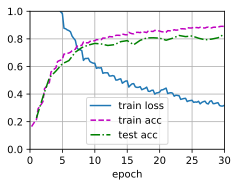

In [ ]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu') #choose device: cpu or gpu
print('Using device:', device)
if torch.cuda.is_available(): print(torch.cuda.get_device_name(0)) # print the type of the chosen gpu
trainf(model, train_loader, test_loader, loss, num_epochs, optimizer, device)

References: 
1. https://pytorch.org/tutorials/beginner/basics/optimization_tutorial.html
1. https://www.kaggle.com/code/stefancomanita/cifar-10-image-classification-with-cnn-in-pytorch
1. https://www.kaggle.com/code/shadabhussain/cifar-10-cnn-using-pytorch
